In [1]:
from rdflib import Graph, URIRef

from viscars.data import DataLoader
from viscars.evaluation.evaluators.kfoldcv import KFoldCrossValidation
from viscars.evaluation.evaluators.loocv import LeaveOneOutCrossValidation
from viscars.evaluation.metrics import MetricType
from viscars.evaluation.metrics.factory import MetricFactory
from viscars.namespace import DASHB, DASHB_V1
from viscars.recommenders.factory import RecommenderFactory, RecommenderType
from viscars.utils import visualize_graph

In [2]:
project = 'proeftuin'

graph = Graph()
graph.parse(f'./data/{project}/graph.ttl', format='n3')
d_loader = DataLoader(graph)

metric_factory = MetricFactory()
recommender_factory = RecommenderFactory()

metrics = ['f1@1', 'ndcg@1', 'ndcg@3']
parsed_metrics = []
for metric in metrics:
    m_split = metric.split('@')
    m_type = m_split[0]
    n = int(m_split[1]) if len(m_split) >= 2 else None

    metric_ = metric_factory.get(MetricType.reverse_lookup(m_type), n)
    parsed_metrics.append(metric_)

# Random Ranker

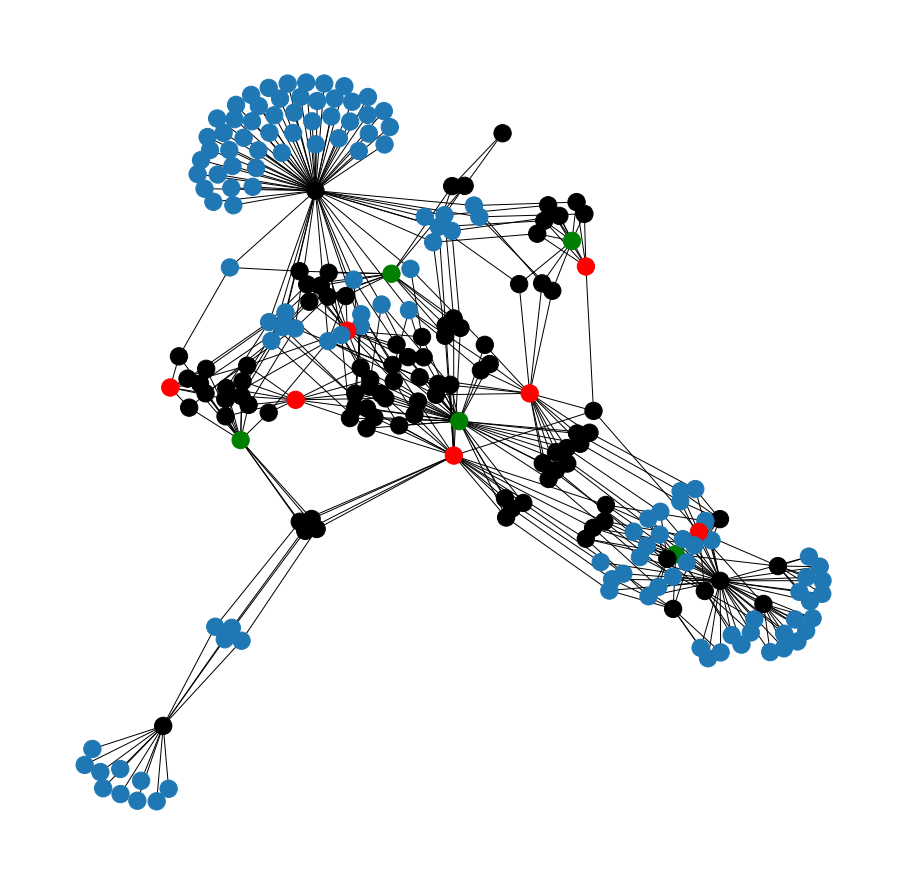

In [4]:
graph = d_loader.load_graph()

visualize_graph(graph, colored=True)

In [5]:
recommender = recommender_factory.get(RecommenderType.RANDOM)(graph)

evaluator = KFoldCrossValidation('proeftuin', recommender, metrics=parsed_metrics, k=5)
result = evaluator.evaluate()

for fold in result['folds']:
    print(fold)
print(result['result'])

{'f1@1': 0.05555555555555555, 'ndcg@1': 0.05555555555555555, 'ndcg@3': 0.1812144170634953}
{'f1@1': 0.05555555555555555, 'ndcg@1': 0.05555555555555555, 'ndcg@3': 0.1607105144841318}
{'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.12565886150793973}
{'f1@1': 0.3333333333333333, 'ndcg@1': 0.3333333333333333, 'ndcg@3': 0.4940438478174652}
{'f1@1': 0.058823529411764705, 'ndcg@1': 0.058823529411764705, 'ndcg@3': 0.24439110399160516}
{'f1@1': 0.10065359477124183, 'ndcg@1': 0.10065359477124183, 'ndcg@3': 0.24120374897292743}


# PageRank (Popularity)

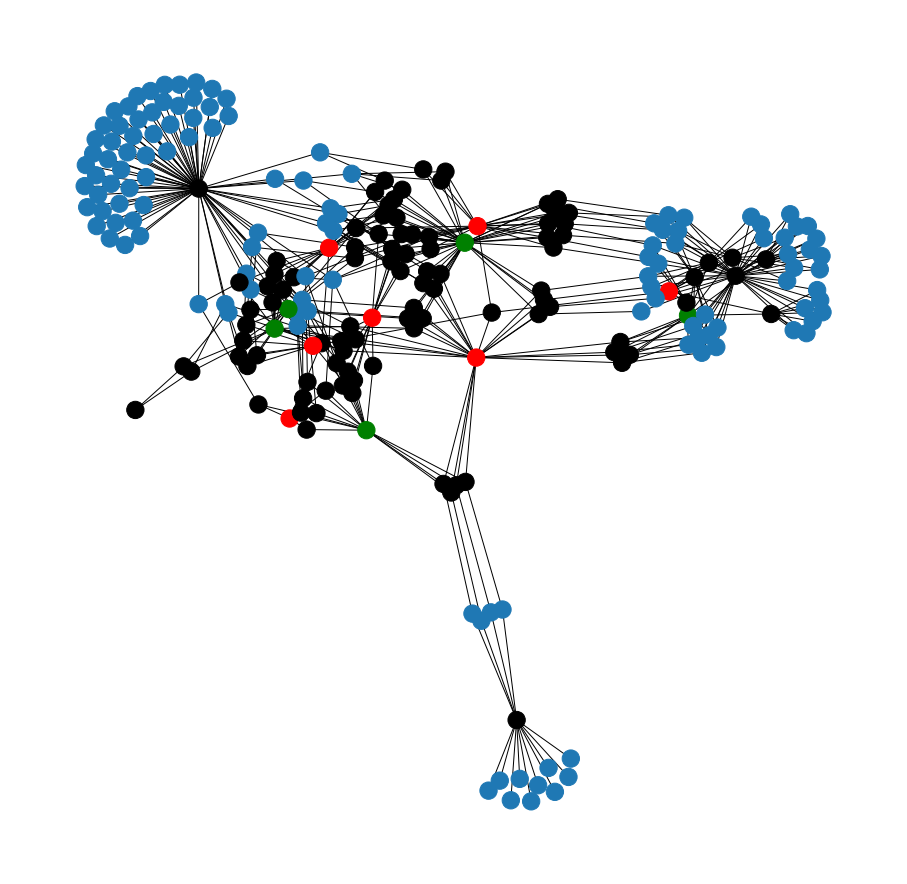

In [6]:
graph = d_loader.load_graph()

visualize_graph(graph, colored=True)

In [7]:
recommender = recommender_factory.get(RecommenderType.PAGERANK)(graph, alpha=0.9)

evaluator = KFoldCrossValidation('proeftuin', recommender, metrics=parsed_metrics, k=5)
result = evaluator.evaluate()

for fold in result['folds']:
    print(fold)
print(result['result'])

{'f1@1': 0.5, 'ndcg@1': 0.5, 'ndcg@3': 0.6329327367063541}
{'f1@1': 0.2777777777777778, 'ndcg@1': 0.2777777777777778, 'ndcg@3': 0.6693021126984257}
{'f1@1': 0.3888888888888889, 'ndcg@1': 0.3888888888888889, 'ndcg@3': 0.6124288341269906}
{'f1@1': 0.6111111111111112, 'ndcg@1': 0.6111111111111112, 'ndcg@3': 0.7294960974206366}
{'f1@1': 0.47058823529411764, 'ndcg@1': 0.47058823529411764, 'ndcg@3': 0.5665252796218505}
{'f1@1': 0.4496732026143791, 'ndcg@1': 0.4496732026143791, 'ndcg@3': 0.6421370121148515}


# Personalized PageRank

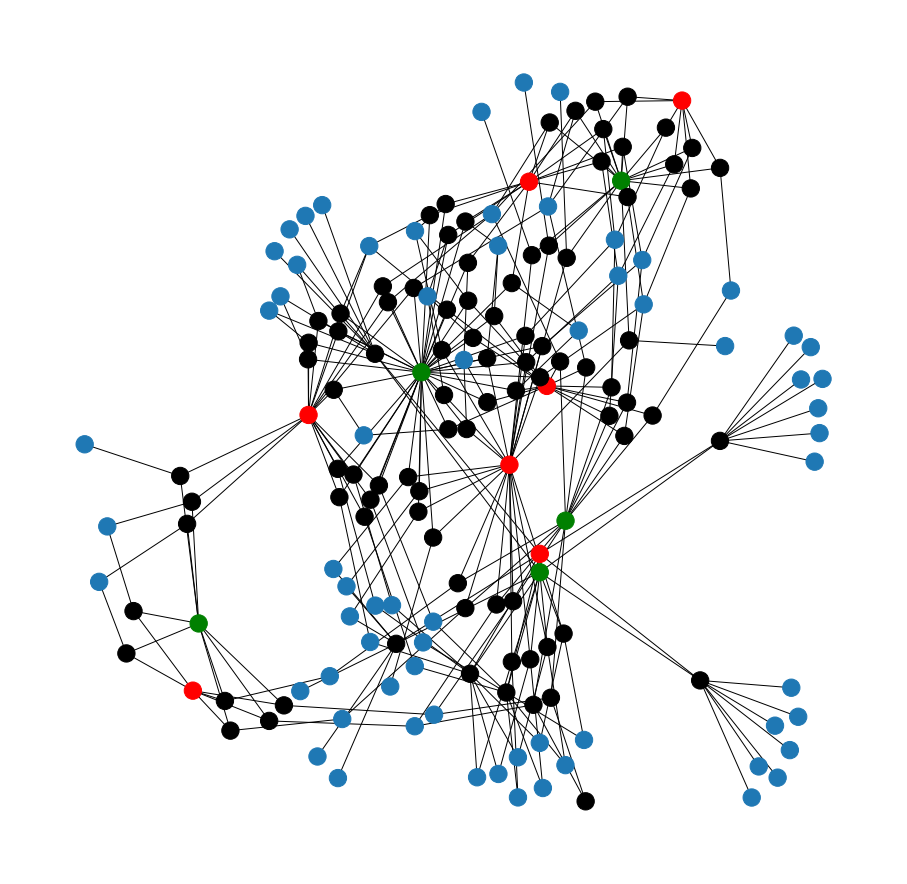

In [8]:
graph = d_loader.load_graph()

graph.remove((None, DASHB.memberOf, None))
graph.remove((None, DASHB_V1['produces'], None))

visualize_graph(graph, colored=True)

## K-Fold CV

In [9]:
recommender = recommender_factory.get(RecommenderType.PPR)(graph, alpha=0.3)
recommender.set_personalization(0.7, 0.3)

evaluator = KFoldCrossValidation('proeftuin', recommender, metrics=parsed_metrics, k=5)
result = evaluator.evaluate()

for fold in result['folds']:
    print(fold)
print(result['result'])

{'f1@1': 0.6111111111111112, 'ndcg@1': 0.6111111111111112, 'ndcg@3': 0.8141471537698494}
{'f1@1': 0.7222222222222222, 'ndcg@1': 0.7222222222222222, 'ndcg@3': 0.8624288341269906}
{'f1@1': 0.7222222222222222, 'ndcg@1': 0.7222222222222222, 'ndcg@3': 0.8624288341269906}
{'f1@1': 0.5, 'ndcg@1': 0.5, 'ndcg@3': 0.793643251190486}
{'f1@1': 0.8431372549019607, 'ndcg@1': 0.8368408462077009, 'ndcg@3': 0.8739543611236691}
{'f1@1': 0.6797385620915033, 'ndcg@1': 0.6784792803526514, 'ndcg@3': 0.8413204868675972}


## Leave-One-Out CV

In [10]:
evaluator = LeaveOneOutCrossValidation('proeftuin', recommender, metrics=parsed_metrics)
result = evaluator.evaluate()

for fold in result['folds']:
    print(fold)
print(result['result'])

{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/7'), 'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.0}
{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/8'), 'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.0}
{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/9'), 'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.47883798034696057}
{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/6'), 'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.39879821011906214}
{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/12'), 'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.6309297535714576}
{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/10'), 'f1@1': 0.5, 'ndcg@1': 0.5, 'ndcg@3': 0.8154648767857289}
{'uid': rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/11'), 'f1@1': 0.0, 'ndcg@1': 0.0, 'ndcg@3': 0.5654648767857289}
{'f1@1': 0.07142857142857142, 'ndcg@1': 0.07142857142857142, 'ndcg@3': 0.

# Personalized PageRank (Context-aware)

In [ ]:
graph = d_loader.load_graph()
visualize_graph(graph, colored=True)

In [ ]:
print('Ratings', len(d_loader.ratings))
print('Users', len(d_loader.user_metadata))
print('Contexts', len(d_loader.context_metadata))
print('Items', len(d_loader.item_metadata))

print('Nodes', len(d_loader.graph.all_nodes()))
print('Edges', len(list(d_loader.graph.triples((None, None, None)))))

recommender = recommender_factory.get(RecommenderType.PPR)(graph, alpha=0.3)
recommender.set_personalization(weight_uid=0.7, weight_cid=0.3)

## K-Fold CV

In [ ]:
evaluator = KFoldCrossValidation('proeftuin', recommender, metrics=parsed_metrics, k=5)
result = evaluator.evaluate()

for fold in result['folds']:
    print(fold)
print(result['result'])

## Leave-One-Out CV

In [ ]:
evaluator = LeaveOneOutCrossValidation('proeftuin', recommender, metrics=parsed_metrics)
result = evaluator.evaluate()

for fold in result['folds']:
    print(fold)
print(result['result'])